## Data

### Data Overview
 - Data is contained in train.csv
 - Train.csv contains 5 columns: 
         - qid1 (Question ID 1)
         - qid2 (Question ID 2)
         - question1 (Question 1)
         - question2 (Question 2)
         - is_duplicate (0 or 1)
 - Number of samples: 4,04,290

## Exploratory Data Analysis

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [5]:
data = pd.read_csv("train.csv")
data.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [6]:
print(data.shape)

(404290, 6)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [29]:
# Let's check an example of each similar question pair and a dissimilar question pair

print("A disismilar question pair: ")
print("Question 1: ",data.iloc[0]['question1'])
print("Question 2: ",data.iloc[0]['question2'])

print("\nA similar pair: ")
print("Question 1: ",data.iloc[5]['question1'])
print("Question 2: ",data.iloc[5]['question2'])

A disismilar question pair: 
Question 1:  What is the step by step guide to invest in share market in india?
Question 2:  What is the step by step guide to invest in share market?

A similar pair: 
Question 1:  Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
Question 2:  I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?


Question pairs are not Similar (is_duplicate = 0): 63.08%
Question pairs are Similar (is_duplicate = 1): 36.92%


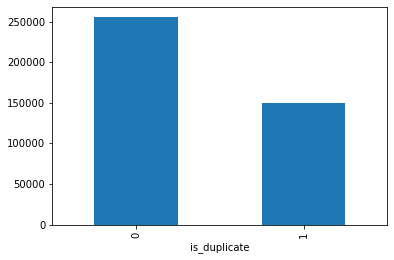

In [36]:
# Let's check the distribution of 0's and 1's in is_duplicate column

data.groupby("is_duplicate")["id"].count().plot.bar()

print("Question pairs are not Similar (is_duplicate = 0): {}%".format(100 - round(data['is_duplicate'].mean()*100, 2)))
print("Question pairs are Similar (is_duplicate = 1): {}%".format(round(data['is_duplicate'].mean()*100, 2)))

#### Observation: The data is not balanced, it is biased towards 0 i.e, We have mostly dissimilar pairs. So, we cannot measure our final preformance with accuracy as a metric.

In [58]:
# Let's check for total unique questions

unique_questions = len(np.unique(data['qid1'].tolist() + data['qid2'].tolist()))
print("Total unique question: ",unique_questions)

Total unique question:  537933


In [62]:
# Let's check total repeated questions

qids_series = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
repeated_questions = sum(qids_series.value_counts() > 1)
print("Total repeated questions (atleast once): ",repeated_questions)

Total repeated questions (atleast once):  111780


Text(0.5, 1.0, 'Unique Questions VS Repeated Questions')

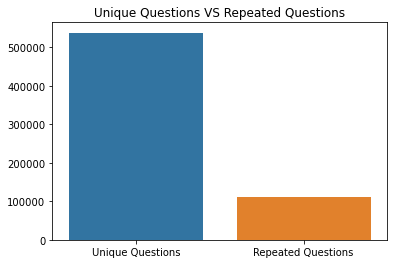

In [70]:
# Plotting the distribution

sns.barplot(x = ["Unique Questions", "Repeated Questions"], y = [unique_questions, repeated_questions])
plt.title("Unique Questions VS Repeated Questions")

#### Question occurences distribution

Maximum number of times a single question is repeated: 157



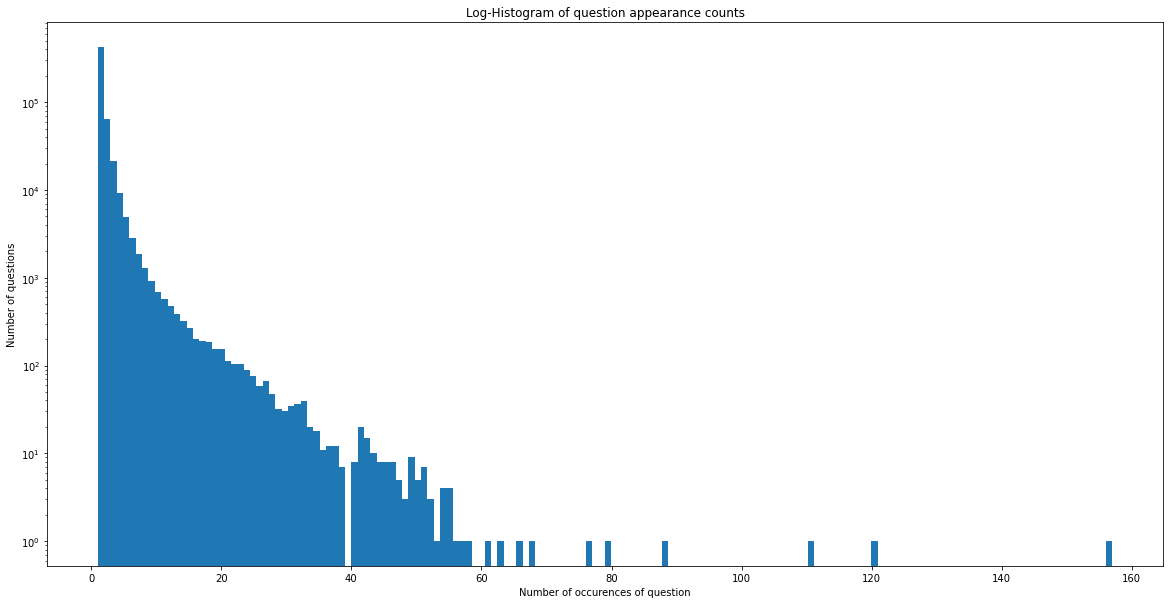

In [77]:
plt.figure(figsize=(20, 10))
plt.hist(qids_series.value_counts(), bins=160)
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids_series.value_counts()))) 

In [80]:
# Let's see if the dataset contains any null/NaN values
data[data.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [82]:
# Let's drop since thers are only 3 data points
data.dropna()
data[data.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate


### Feature Extraction (Part - I)

#### Let's extract some more features:
 - __freq_qid1__: Frequencies of qid1
 - __freq_qid2__: Frequencies of qid2
 - __q1_len__: Length of question 1
 - __q2_len__: Length of question 2
 - __q1_n_words__: Total words in question 1
 - __q2_n_words__: Total words in question 2
 - __common_words__: Total common words in question 1 and question 2
 - __total_words__: Total number of words in both questions
 - __words_ratio__: (common_words) / (total_words)
 - __freq1 + freq2__: Sum of frequencies of both the questions
 - __freq1 - freq2__: Absolute difference of frequency of both questions